In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### Вариант 1

In [2]:
def stack_pred(estimator, X, y, Xt, k=3, method='predict'):
    
    sX = np.zeros((X.shape[0]))
    for train_index, test_index in KFold(n_splits = k).split(X, y):
        X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        model = estimator.fit(X_train, y_train)
        sX[test_index] = model.predict(X_test)
        
    model = estimator.fit(X, y)
    sXt = model.predict(Xt)
        
    return sX, sXt

### Вариант 2

In [3]:
def stack_pred(estimator, X, y, Xt, k=3, method='predict'):
    
    sX = np.zeros((X.shape[0]))
    r = np.zeros((Xt.shape[0],k+1))
    i=0
    for train_index, test_index in KFold(n_splits = k).split(X, y):
        X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        model = estimator.fit(X_train, y_train)
        sX[test_index] = model.predict(X_test)
        r[:,i] = model.predict(Xt)
        i+=1
    
    for i in range(0,Xt.shape[0]):
        if sum(r[i])/k > 0.5:
            r[i,-1] = 1
        else: r[i,-1] = 0
    sXt = r[:,-1]
        
    return sX, sXt

### Применение

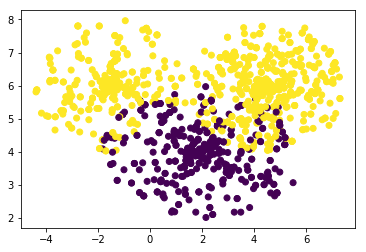

In [4]:
data = pd.read_csv('dataset1.csv', sep = '\t')
#plt.figure()
plt.scatter(data.F1, data.F2, c=data['T'])
plt.show()

LR ROC-AUC = 0.810855489737


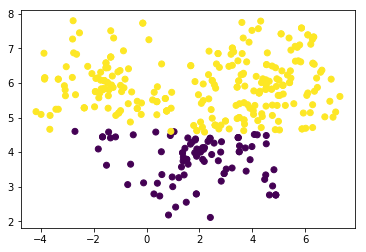

RF ROC-AUC = 0.94231299077


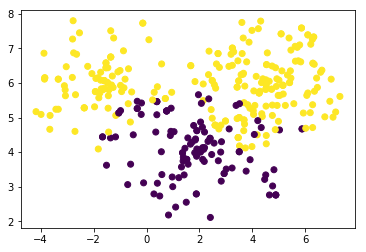

KNC ROC-AUC = 0.874638379942


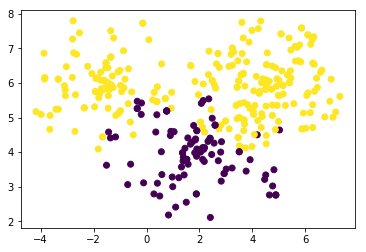

In [5]:
data = np.array(data)
X_train, X_test, y_train, y_test = train_test_split(data[:,:-1], data[:,-1], train_size = 0.7, random_state = 17)
lr = LogisticRegression(random_state = 3).fit(X_train, y_train)
res = lr.predict(X_test)
print('LR ROC-AUC = ' + str(roc_auc_score(y_test, res)))
plt.scatter(X_test[:,0], X_test[:,1], c=res)
plt.show()

rf = RandomForestClassifier(random_state = 7).fit(X_train, y_train)
res = rf.predict(X_test)
print('RF ROC-AUC = ' + str(roc_auc_score(y_test, res)))
plt.scatter(X_test[:,0], X_test[:,1], c=res)
plt.show()

knc = KNeighborsClassifier().fit(X_train, y_train)
res = knc.predict(X_test)
print('KNC ROC-AUC = ' + str(roc_auc_score(y_test, res)))
plt.scatter(X_test[:,0], X_test[:,1], c=res)
plt.show()

Stacking KN ROC-AUC = 0.948512191762


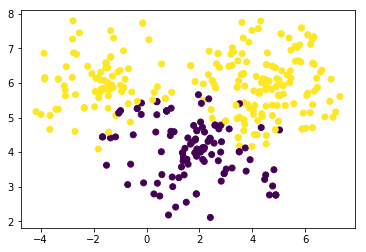

In [6]:
meta_train = np.zeros((X_train.shape[0],3))
meta_test = np.zeros((X_test.shape[0],3))
meta_train[:,0], meta_test[:,0] = stack_pred(lr, X_train, y_train, X_test)
meta_train[:,1], meta_test[:,1] = stack_pred(rf, X_train, y_train, X_test)
meta_train[:,2], meta_test[:,2] = stack_pred(knc, X_train, y_train, X_test)
meta_alg = SVC(random_state = 7).fit(meta_train, y_train)
res = meta_alg.predict(meta_test)
print('Stacking KN ROC-AUC = ' + str(roc_auc_score(y_test, res)))
plt.scatter(X_test[:,0], X_test[:,1], c=res)
plt.show()